In [43]:
import numpy as np

In [44]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [46]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [47]:
from tensorflow.keras.utils import to_categorical

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [49]:
train_images.shape

(50000, 32, 32, 3)

In [50]:
len(train_labels)

50000

In [51]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
test_images.shape

(10000, 32, 32, 3)

In [53]:
len(test_labels)

10000

In [54]:
test_labels.shape

(10000, 10)

In [55]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

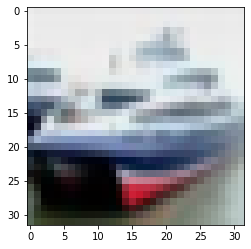

In [56]:
import matplotlib.pyplot as plt
img = test_images[1]
plt.imshow(img)

In [59]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

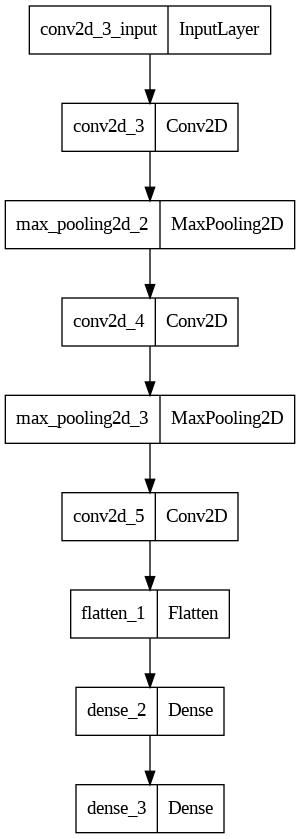

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [63]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 9s 6ms/step - loss: 1.6227 - accuracy: 0.4064
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2486 - accuracy: 0.5546
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0849 - accuracy: 0.6182
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9758 - accuracy: 0.6597
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9039 - accuracy: 0.6855
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8471 - accuracy: 0.7036
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8030 - accuracy: 0.7190
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7613 - accuracy: 0.7345
Epoch 9/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7245 - accuracy: 0.7460
Epoch 10/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6871 - accuracy: 0.7602

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8832 - accuracy: 0.7033
